# Лабораторная работа 1. Линейная регрессия. Нормальное уравнение

Если для оценки качества в регресии используется среднеквадратичная ошибка (*mean squared error, MSE*), то ошибка на одном примере (*функция потерь*) будет определяться выражением:

$$L(y,a)=(a-y)^2$$

а суммарная ошибка (*функционал ошибки*):

$$MSE(a,X)=\frac1{l}\sum_{i=1}^lL(y_i,a(\overrightarrow{x_i}))=\frac1{l}\sum_{i=1}^l(a(\overrightarrow{x_i})-y_i)^2$$

В случае линейной регресии:

$$a(\overrightarrow{x_i})=\langle \overrightarrow{w},\overrightarrow{x_i}\rangle$$

Задача оптимизации:

$$\frac1{l}\sum_{i=1}^l (\langle \overrightarrow{w},\overrightarrow{x_i}\rangle-y_i)^2\to \min_{\overrightarrow{w}}$$

Тогда, продифференцировав функционал ошибки по $\overrightarrow{w}$, приравняв его нулю и решив полученное уравнение, получим следующее выражение для оптимального вектора весов, которое называется *нормальным уравнением*:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

**Задание 1. Пример из лекций**

Напишите функцию ``get_weight``, которая находит вектор весов на основе нормального уравнения.

Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5$$

$$y_1=1, y_2=3, y_3=4$$

Имейте в виду, что $X$ – это матрица (в данном примере состоящая из одного столбца).

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.

In [241]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
X = np.array([2, 3, 5])
y = np.array([1, 3, 4])

In [243]:
# step by step solution
print("X")
print(X)
print("X shape ", X.shape)
print("y")
print(y)
print("y shape", y.shape)
X_resh = X.reshape(-1, 1)
print("X_resh and shape\n", X_resh, X_resh.shape)
X_c = np.concatenate([np.ones((X_resh.shape[0], 1)), X_resh], axis=1)
print("X concatenated with ones and shape\n", X_c, X_c.shape)
X_ct = X_c.T
print("transposed and shape\n", X_ct, X_ct.shape)
X_mult = X_ct.dot(X_c)
print("product and shape\n", X_mult, X_mult.shape)
X_inv = np.linalg.inv(X_mult)
print("X inv ahd shape\n", X_inv, X_inv.shape)
X_inv_prod = X_inv.dot(X_ct)
print("X_inv_prod and shape\n", X_inv_prod, X_inv_prod.shape)
X_y_prod = X_inv_prod.dot(y)
print("X_y_prod\n", X_y_prod, X_y_prod.shape)

X
[2 3 5]
X shape  (3,)
y
[1 3 4]
y shape (3,)
X_resh and shape
 [[2]
 [3]
 [5]] (3, 1)
X concatenated with ones and shape
 [[1. 2.]
 [1. 3.]
 [1. 5.]] (3, 2)
transposed and shape
 [[1. 1. 1.]
 [2. 3. 5.]] (2, 3)
product and shape
 [[ 3. 10.]
 [10. 38.]] (2, 2)
X inv ahd shape
 [[ 2.71428571 -0.71428571]
 [-0.71428571  0.21428571]] (2, 2)
X_inv_prod and shape
 [[ 1.28571429  0.57142857 -0.85714286]
 [-0.28571429 -0.07142857  0.35714286]] (2, 3)
X_y_prod
 [-0.42857143  0.92857143] (2,)


In [244]:
def get_weight(X, y):
    X = X.reshape(-1, 1)
    X_c = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

    return np.linalg.inv(X_c.T.dot(X_c)).dot(X_c.T).dot(y)

In [245]:
weights = get_weight(X, y)
print("weights: ", weights)

weights:  [-0.42857143  0.92857143]


In [246]:
def get_prediction(x):
    return weights[1] * x + weights[0]

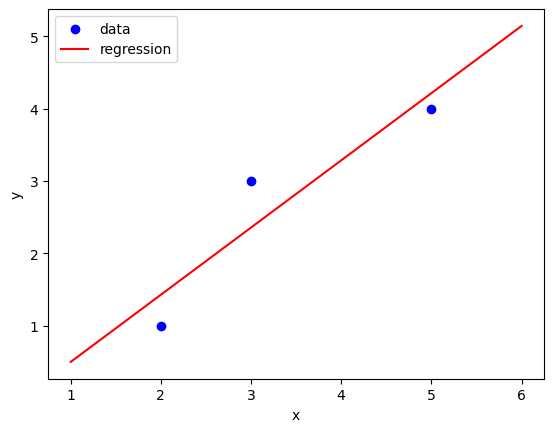

In [247]:
plt.scatter(X, y, color="blue", label="data")
X_line = np.linspace(1, 6, 100)
y_line = get_prediction(X_line)
plt.plot(X_line, y_line, color="red", label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Найдите значения функционалов ошибки $MSE$, $RMSE$, $R^2$.

In [248]:
def MSE(y_test, y_predict):
    return np.mean((y_test - y_predict) ** 2)


def RMSE(y_test, y_predict):
    return np.sqrt(MSE(y_test, y_predict))


def R2(y_test, y_predict):
    ss_res = np.sum((y_test - y_predict) ** 2)
    ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (ss_res / ss_tot)

Сравните полученные значения с библиотечными функциями $MSE$ и $R2$ из [scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

In [249]:
from sklearn.metrics import mean_squared_error, r2_score

y_test = y
y_predict = np.array([get_prediction(2), get_prediction(3), get_prediction(5)])


def show_errors_diffs(y_test, y_predict):
    print(f"MSE: {MSE(y_test, y_predict)}, MSE(sklearn) {mean_squared_error(y_test, y_predict)}")
    print(f"R2: {R2(y_test, y_predict)}, R2 (sklearn) {r2_score(y_test, y_predict)}")

In [250]:
print(f"RMSE: {RMSE(y_test, y_predict)}")
show_errors_diffs(y_test, y_predict)

RMSE: 0.4629100498862757
MSE: 0.21428571428571427, MSE(sklearn) 0.21428571428571427
R2: 0.8622448979591837, R2 (sklearn) 0.8622448979591837


**Задание 2. Более сложный пример**.
Скачайте файлы ``ml_lab1_train.txt`` и ``ml_lab1_test.txt``. В первом из них находится обучающая выборка, а во втором – тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом – $n$ точек (значения аргумента $x$), во втором – значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача – по обучающей выборке подобрать функцию $y = a(x)$, приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [251]:
data_train = np.loadtxt('../data/ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('../data/ml_lab1_test.txt', delimiter=',')

In [252]:
X_train = data_train[:, 0]
y_train = data_train[:, 1]
X_test = data_test[:, 0]
y_test = data_test[:, 1]
print(X_train, y_train)
print(X_test, y_test)

[-0.2  -0.14 -0.08 -0.02  0.04  0.1   0.16  0.22  0.28  0.34  0.4   0.46
  0.52  0.58  0.64  0.7   0.76  0.82  0.88  0.94  1.  ] [4.10083261 4.75632474 4.16278839 4.94568077 4.9964461  3.67344585
 4.07405522 4.12650853 5.25101279 5.69160283 5.06788376 6.07176274
 5.76661215 5.76998646 5.39647832 5.46744837 5.46450349 7.23168494
 6.09781368 7.0778812  7.05182585]
[-0.3  -0.23 -0.16 -0.09 -0.02  0.05  0.12  0.19  0.26  0.33  0.4   0.47
  0.54  0.61  0.68  0.75  0.82  0.89  0.96  1.03  1.1 ] [4.22468198 3.6806801  4.86193723 4.12182311 3.89129282 4.77528678
 4.84650657 3.29232057 3.77839618 4.16851703 5.43651587 4.74066998
 5.45091177 5.23766541 5.84027585 5.79299791 7.12448917 6.11752856
 6.00190132 7.26882794 7.48272721]


Найдите с помощью функции ``get_weight`` линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость.  
Выведите значения весовых коэффициентов.

In [253]:
weights = get_weight(X_train, y_train)
print("weights", weights)

weights [4.43323091 2.2791345 ]


Нарисуйте на плоскости точки обучающей и тестовой выборок (раскрасив в два цвета) $(x_i, y_i)$ и полученную линейную функцию.

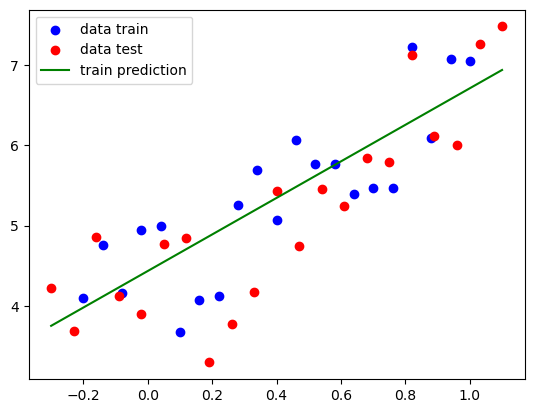

In [254]:
plt.scatter(X_train, y_train, color="blue", label="data train")
plt.scatter(X_test, y_test, color="red", label="data test")
y_test_predict = get_prediction(X_test)
plt.plot(X_test, y_test_predict, color="green", label="train prediction")
plt.legend()
plt.show()

Найдите значения функционалов ошибки $MSE$, $RMSE$, $R^2$. Сравните их со значениями библиотечных функций `scikit-learn`.

In [255]:
show_errors_diffs(y_test, y_test_predict)

y_train_predict = get_prediction(X_train)
print("errors values for train data")
show_errors_diffs(y_train, y_train_predict)

MSE: 0.4351202004048882, MSE(sklearn) 0.4351202004048882
R2: 0.6848801332179667, R2 (sklearn) 0.6848801332179667
errors values for train data
MSE: 0.2968966332625196, MSE(sklearn) 0.2968966332625196
R2: 0.6978349896117897, R2 (sklearn) 0.6978349896117897
